#### Assignment 1: Predict the price of Uber ride
* Name: Atul Naveen
* Class: BE-COMP(B)
* Roll: BCB13

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("uber.csv")
df.head()

Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

#### 1. Data Pre-processing

In [11]:
df.shape

(200000, 9)

In [13]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [15]:
df.drop(columns=['Unnamed: 0','key'],inplace=True)
df.head()

fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1          7.7  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2         12.9  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3          5.3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4         16.0  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [17]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [19]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace=True)

C:\Users\Atul\AppData\Local\Temp\ipykernel_28792\2429018586.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)
C:\Users\Atul\AppData\Local\Temp\ipykernel_28792\2429018586.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [21]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [23]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [25]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [26]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [29]:
df=df.assign(hour= df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month= df.pickup_datetime.dt.month,
             year= df.pickup_datetime.dt.year,
             dayofweek= df.pickup_datetime.dt.dayofweek)

In [31]:
df

fare_amount           pickup_datetime  pickup_longitude  \
0               7.5 2015-05-07 19:52:06+00:00        -73.999817   
1               7.7 2009-07-17 20:04:56+00:00        -73.994355   
2              12.9 2009-08-24 21:45:00+00:00        -74.005043   
3               5.3 2009-06-26 08:22:21+00:00        -73.976124   
4              16.0 2014-08-28 17:47:00+00:00        -73.925023   
...             ...                       ...               ...   
199995          3.0 2012-10-28 10:49:00+00:00        -73.987042   
199996          7.5 2014-03-14 01:09:00+00:00        -73.984722   
199997         30.9 2009-06-29 00:42:00+00:00        -73.986017   
199998         14.5 2015-05-20 14:56:25+00:00        -73.997124   
199999         14.1 2010-05-15 04:08:00+00:00        -73.984395   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0             40.738354         -73.999512         40.723217                1   
1             40.728225         -73.994710         40.750325                1   
2             40.740770         -73.962565         40.772647                1   
3             40.790844         -73.965316         40.803349                3   
4             40.744085         -73.973082         40.761247                5   
...                 ...                ...               ...              ...   
199995        40.739367         -73.986525         40.740297                1   
199996        40.736837         -74.006672         40.739620                1   
199997        40.756487         -73.858957         40.692588                2   
199998        40.725452         -73.983215         40.695415                1   
199999        40.720077         -73.985508         40.768793                1   

        hour  day  month  year  dayofweek  
0         19    7      5  2015          3  
1         20   17      7  2009          4  
2         21   24      8  2009          0  
3          8   26      6  2009          4  
4         17   28      8  2014          3  
...      ...  ...    ...   ...        ...  
199995    10   28     10  2012          6  
199996     1   14      3  2014          4  
199997     0   29      6  2009          0  
199998    14   20      5  2015          2  
199999     4   15      5  2010          5  

[200000 rows x 12 columns]

In [33]:
df=df.drop(['pickup_datetime'],axis=1)
df

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0               7.5        -73.999817        40.738354         -73.999512   
1               7.7        -73.994355        40.728225         -73.994710   
2              12.9        -74.005043        40.740770         -73.962565   
3               5.3        -73.976124        40.790844         -73.965316   
4              16.0        -73.925023        40.744085         -73.973082   
...             ...               ...              ...                ...   
199995          3.0        -73.987042        40.739367         -73.986525   
199996          7.5        -73.984722        40.736837         -74.006672   
199997         30.9        -73.986017        40.756487         -73.858957   
199998         14.5        -73.997124        40.725452         -73.983215   
199999         14.1        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  hour  day  month  year  dayofweek  
0              40.723217                1    19    7      5  2015          3  
1              40.750325                1    20   17      7  2009          4  
2              40.772647                1    21   24      8  2009          0  
3              40.803349                3     8   26      6  2009          4  
4              40.761247                5    17   28      8  2014          3  
...                  ...              ...   ...  ...    ...   ...        ...  
199995         40.740297                1    10   28     10  2012          6  
199996         40.739620                1     1   14      3  2014          4  
199997         40.692588                2     0   29      6  2009          0  
199998         40.695415                1    14   20      5  2015          2  
199999         40.768793                1     4   15      5  2010          5  

[200000 rows x 11 columns]

##### Calculating the travel distance using Longitude and Latitude

In [35]:
from math import *
def _distance(longitude_1,latitude_1,longitude_2,latitude_2):
    travel_dist=[]
    for pos in range(len(longitude_1)):
        lon1,lat1,lon2,lat2= map(radians,[longitude_1[pos],latitude_1[pos],longitude_2[pos],latitude_2[pos]])
        longitude_distance= lon2-lon1
        latitude_distance= lat2-lat1
        a= sin(latitude_distance/2)**2 + cos(lat1)*cos(lat2)*sin(longitude_distance/2)**2
        c= 2*asin(sqrt(a))*6371
        travel_dist.append(c)
    return travel_dist

##### Adding the distance travelled column 

In [37]:
df['dist_travel_km']= _distance(df.pickup_longitude.to_numpy(),df.pickup_latitude.to_numpy(),df.dropoff_longitude.to_numpy(),df.dropoff_latitude.to_numpy())

#### 2. Dealing with the Outlier

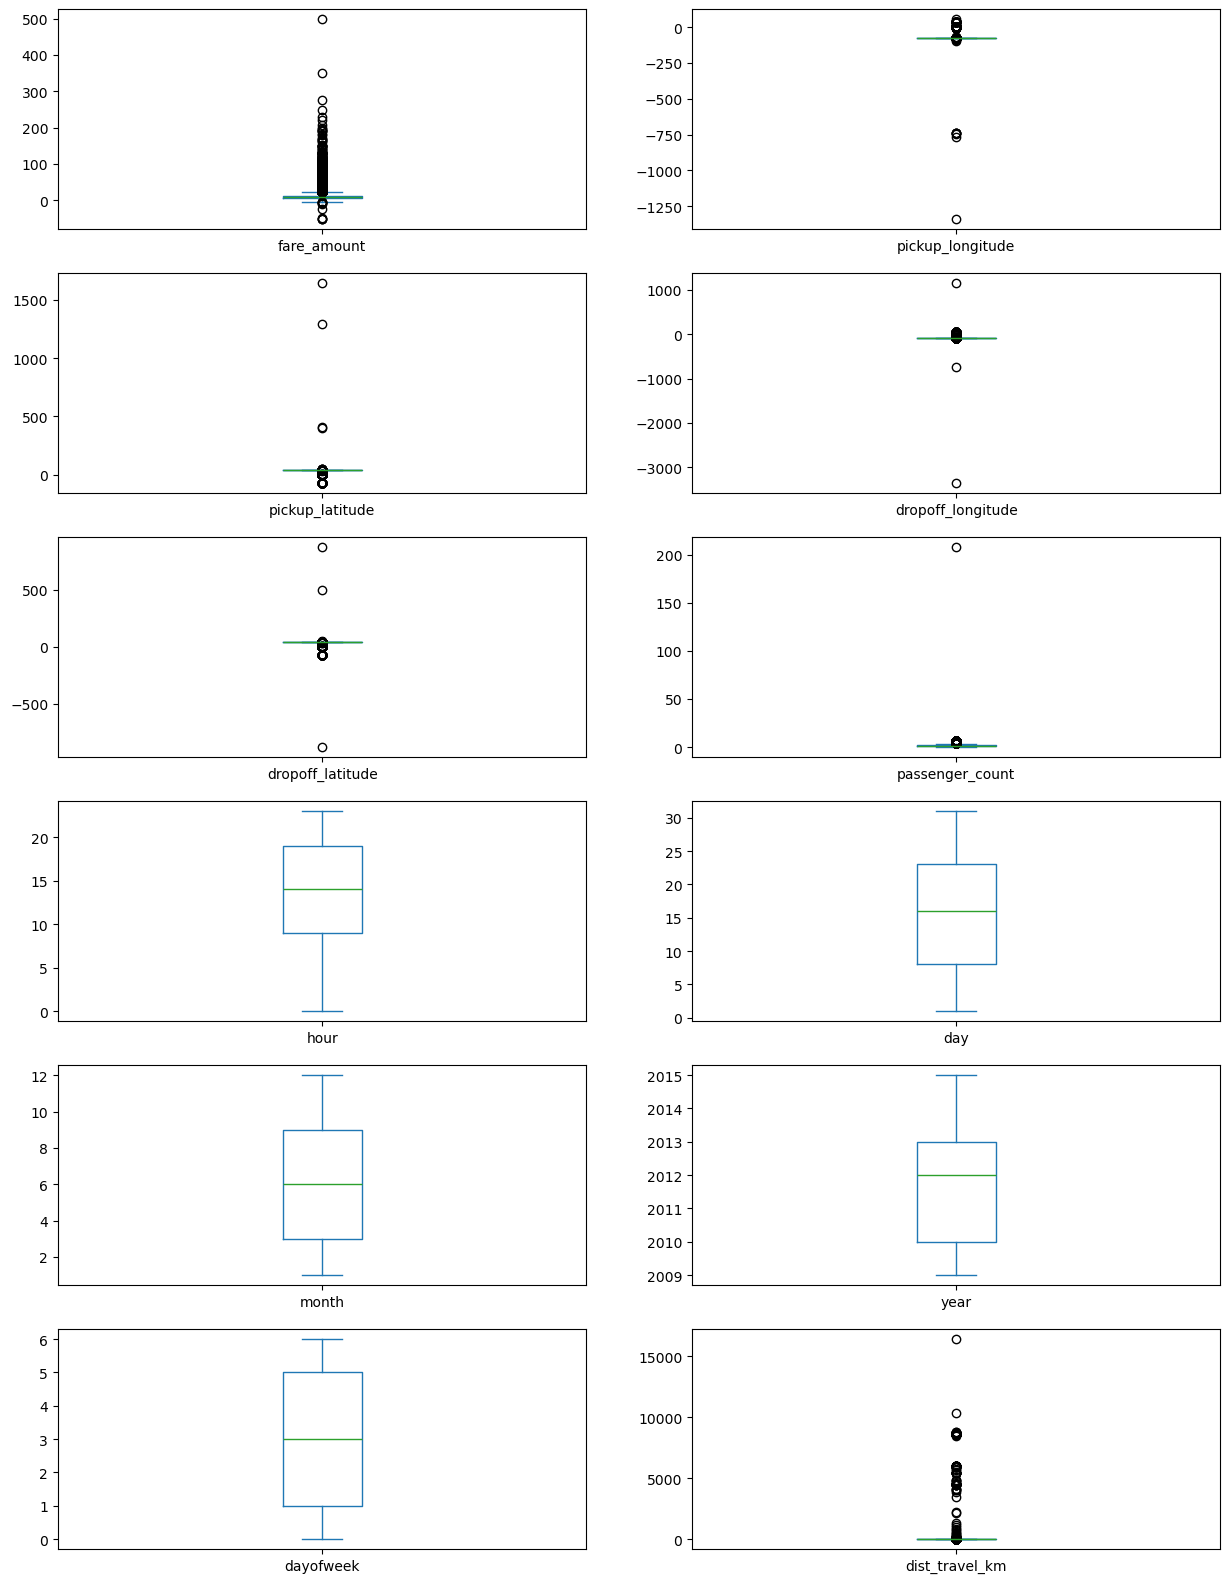

In [39]:
df.plot(kind='box',subplots=True,layout=(6,2),figsize=(15,20))
plt.show()

In [44]:
def remove_outliers(df1, col):
        q1 = df1[col].quantile(0.25)
        q3 = df1[col].quantile(0.75)
        IQR = q3 - q1
        lb = float(q1 - 1.5 * IQR)  
        ub = float(q3 + 1.5 * IQR) 
        df[col] = np.clip(df1[col],lb,ub)
        return df1

def treat_outliers(df1,col_list):
    for c in col_list:
        df1=remove_outliers(df,c)
    return df1
        

In [46]:
df= treat_outliers(df,df.iloc[:,0::])

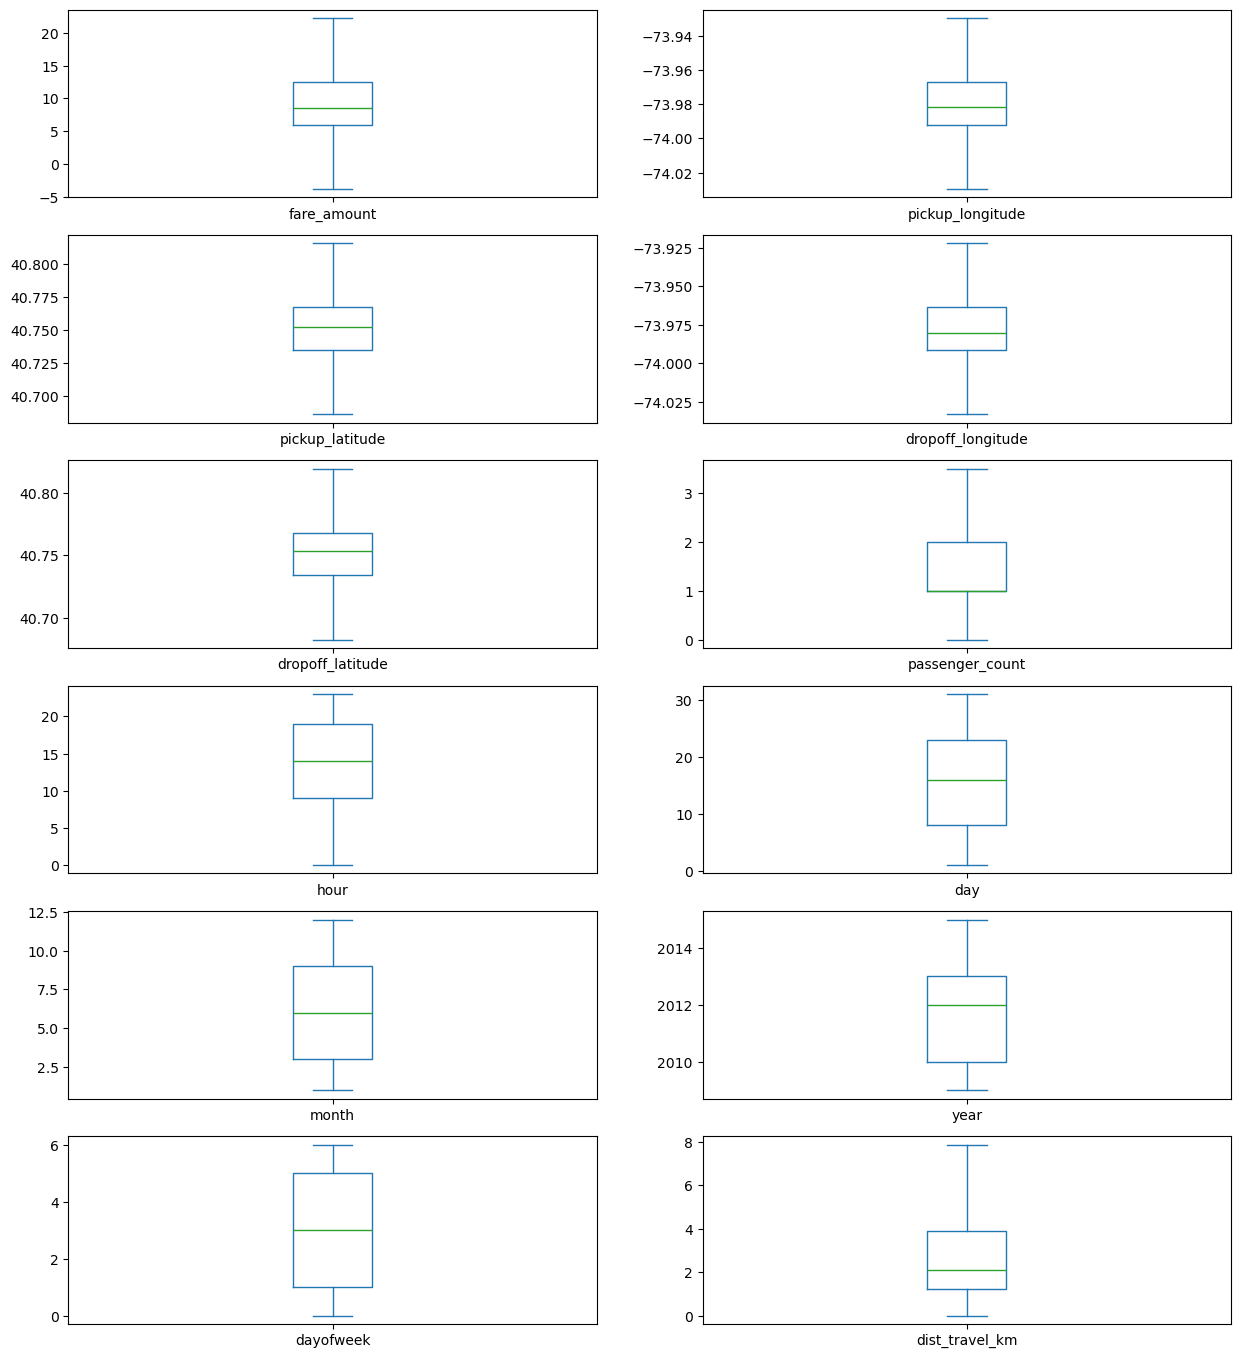

In [48]:
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))
plt.show()

#### 3. Check for Co-relation

In [51]:
corr=df.corr()
corr

fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.154069        -0.110842   
pickup_longitude      0.154069          1.000000         0.259497   
pickup_latitude      -0.110842          0.259497         1.000000   
dropoff_longitude     0.218675          0.425619         0.048889   
dropoff_latitude     -0.125898          0.073290         0.515714   
passenger_count       0.015778         -0.013213        -0.012889   
hour                 -0.023623          0.011579         0.029681   
day                   0.004534         -0.003204        -0.001553   
month                 0.030817          0.001169         0.001562   
year                  0.141277          0.010198        -0.014243   
dayofweek             0.013652         -0.024652        -0.042310   
dist_travel_km        0.844374          0.098094        -0.046812   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
fare_amount                 0.218675         -0.125898         0.015778   
pickup_longitude            0.425619          0.073290        -0.013213   
pickup_latitude             0.048889          0.515714        -0.012889   
dropoff_longitude           1.000000          0.245667        -0.009303   
dropoff_latitude            0.245667          1.000000        -0.006308   
passenger_count            -0.009303         -0.006308         1.000000   
hour                       -0.046558          0.019783         0.020274   
day                        -0.004007         -0.003479         0.002712   
month                       0.002391         -0.001193         0.010351   
year                        0.011346         -0.009603        -0.009749   
dayofweek                  -0.003336         -0.031919         0.048550   
dist_travel_km              0.186531         -0.038900         0.009709   

                       hour       day     month      year  dayofweek  \
fare_amount       -0.023623  0.004534  0.030817  0.141277   0.013652   
pickup_longitude   0.011579 -0.003204  0.001169  0.010198  -0.024652   
pickup_latitude    0.029681 -0.001553  0.001562 -0.014243  -0.042310   
dropoff_longitude -0.046558 -0.004007  0.002391  0.011346  -0.003336   
dropoff_latitude   0.019783 -0.003479 -0.001193 -0.009603  -0.031919   
passenger_count    0.020274  0.002712  0.010351 -0.009749   0.048550   
hour               1.000000  0.004677 -0.003926  0.002156  -0.086947   
day                0.004677  1.000000 -0.017360 -0.012170   0.005617   
month             -0.003926 -0.017360  1.000000 -0.115859  -0.008786   
year               0.002156 -0.012170 -0.115859  1.000000   0.006113   
dayofweek         -0.086947  0.005617 -0.008786  0.006113   1.000000   
dist_travel_km    -0.038366  0.003062  0.011628  0.024278   0.027053   

                   dist_travel_km  
fare_amount              0.844374  
pickup_longitude         0.098094  
pickup_latitude         -0.046812  
dropoff_longitude        0.186531  
dropoff_latitude        -0.038900  
passenger_count          0.009709  
hour                    -0.038366  
day                      0.003062  
month                    0.011628  
year                     0.024278  
dayofweek                0.027053  
dist_travel_km           1.000000

<Axes: >

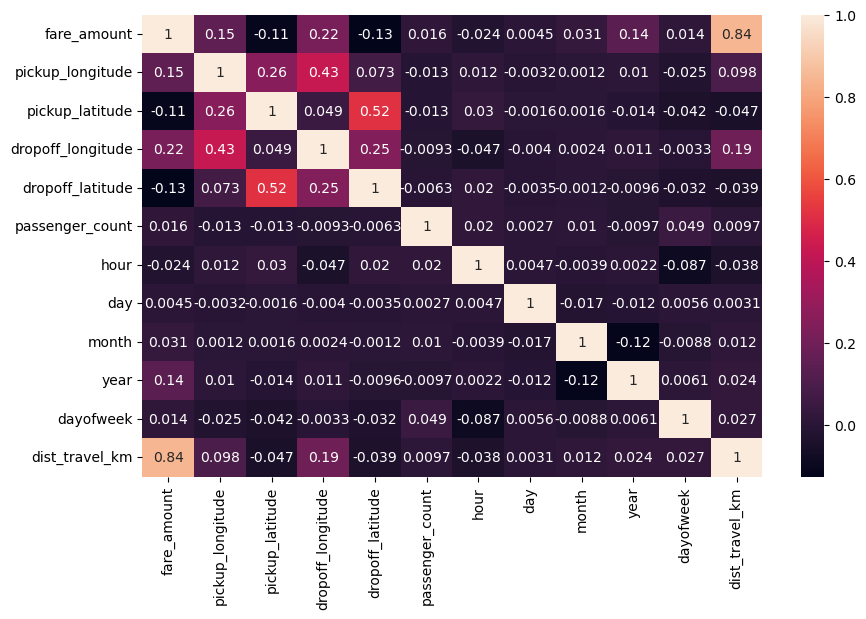

In [53]:
fig,axis= plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

#### 4. Implement the Linear Regression and Random Forest Regression models

In [56]:
df.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.929786        40.744085         -73.973082   

   dropoff_latitude  passenger_count  hour  day  month  year  dayofweek  \
0         40.723217              1.0    19    7      5  2015          3   
1         40.750325              1.0    20   17      7  2009          4   
2         40.772647              1.0    21   24      8  2009          0   
3         40.803349              3.0     8   26      6  2009          4   
4         40.761247              3.5    17   28      8  2014          3   

   dist_travel_km  
0        1.683323  
1        2.457590  
2        5.036377  
3        1.661683  
4        4.475450

In [58]:
df_x=df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
df_y= df['fare_amount']

##### Splitting the data into training and testing data

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test= train_test_split(df_x,df_y,test_size=0.2,random_state=1)

In [64]:
df

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0              7.50        -73.999817        40.738354         -73.999512   
1              7.70        -73.994355        40.728225         -73.994710   
2             12.90        -74.005043        40.740770         -73.962565   
3              5.30        -73.976124        40.790844         -73.965316   
4             16.00        -73.929786        40.744085         -73.973082   
...             ...               ...              ...                ...   
199995         3.00        -73.987042        40.739367         -73.986525   
199996         7.50        -73.984722        40.736837         -74.006672   
199997        22.25        -73.986017        40.756487         -73.922036   
199998        14.50        -73.997124        40.725452         -73.983215   
199999        14.10        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  hour  day  month  year  dayofweek  \
0              40.723217              1.0    19    7      5  2015          3   
1              40.750325              1.0    20   17      7  2009          4   
2              40.772647              1.0    21   24      8  2009          0   
3              40.803349              3.0     8   26      6  2009          4   
4              40.761247              3.5    17   28      8  2014          3   
...                  ...              ...   ...  ...    ...   ...        ...   
199995         40.740297              1.0    10   28     10  2012          6   
199996         40.739620              1.0     1   14      3  2014          4   
199997         40.692588              2.0     0   29      6  2009          0   
199998         40.695415              1.0    14   20      5  2015          2   
199999         40.768793              1.0     4   15      5  2010          5   

        dist_travel_km  
0             1.683323  
1             2.457590  
2             5.036377  
3             1.661683  
4             4.475450  
...                ...  
199995        0.112210  
199996        1.875050  
199997        7.865286  
199998        3.539715  
199999        5.417783  

[200000 rows x 12 columns]

##### Applying the Linear Regression model

In [66]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

##### Prediction Result of the Linear Regression Model

In [68]:
y_pred_lin= reg.predict(x_test)
print(y_pred_lin)

[ 6.27615184  5.09986098  9.43641238 ... 11.07663949 12.15392248
 11.41496075]


##### Applying the Random Forest Regression Model

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestRegressor()

##### Prediction Result of the Random Forest Regression Model

In [76]:
y_pred_rf= rf.predict(x_test)
print(y_pred_rf)

[ 5.264   6.2     9.5975 ... 11.52   10.888  13.233 ]


#### 5. Evaluate the models and compare their respective scores- RMSE and R-Squared 

In [102]:
cols= ['Model','RMSE','R-Squared']
result_tabulation= pd.DataFrame(columns=cols)

In [80]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [106]:
reg_RMSE= np.sqrt(metrics.mean_squared_error(y_test,y_pred_lin))
reg_squared= r2_score(y_test,y_pred_lin)
full_metrics= pd.DataFrame({'Model':['Linear Regression'],'RMSE':[reg_RMSE],'R-Squared':[reg_squared]})
result_tabulation=pd.concat([result_tabulation,full_metrics],ignore_index=True)
print(result_tabulation)

               Model      RMSE  R-Squared
0  Linear Regression  2.703957   0.753906


In [108]:
rf_RMSE= np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf))
rf_squared= r2_score(y_test,y_pred_rf)
full_metrics= pd.DataFrame({'Model':['Random Forest'],'RMSE':[rf_RMSE],'R-Squared':[rf_squared]})
result_tabulation=pd.concat([result_tabulation,full_metrics],ignore_index=True)
print(result_tabulation)

               Model      RMSE  R-Squared
0  Linear Regression  2.703957   0.753906
1      Random Forest  2.360574   0.812442


### CONCLUSIONS

* The Random Forest Model outperforms the Linear Regression Model based on both RMSE and R-Squared metrics.
* The lower RMSE value for Random Forest Model suggests that the predictions are more accurate.
* The higher R-Squared value for Random Forest Model suggests that the model is better fit to the data than Linear Regression Model.